# Importing neccessary Libraries

In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pathlib

In [2]:
# necessary libraries
import os
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
from skimage.io import imread
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D

#Mounting Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Giving Base_path

In [5]:
base_path='/content/drive/MyDrive/MMU-Iris-Database'

# DataGenerator


In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255)  # Normalize pixel values between 0 and 1 such that it reduces fitting problems

batch_size = 64
image_size = (224, 224)

dataset_generator = data_generator.flow_from_directory(
     base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',shuffle=True
)

Found 450 images belonging to 45 classes.


In [70]:
data_generator

In [71]:
img_height, img_width = 224, 224
batch_size = 32
num_classes = 45
epochs = 10


In [72]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

### Training data


In [73]:
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 360 images belonging to 45 classes.


###Validation Data

In [74]:
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 90 images belonging to 45 classes.


In [75]:
validation_images, validation_labels = next(validation_generator)
train_images, train_labels = next(train_generator)

def display_images(images, labels, title):
    plt.figure(figsize=(15, 8))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

##Displaying sample Data

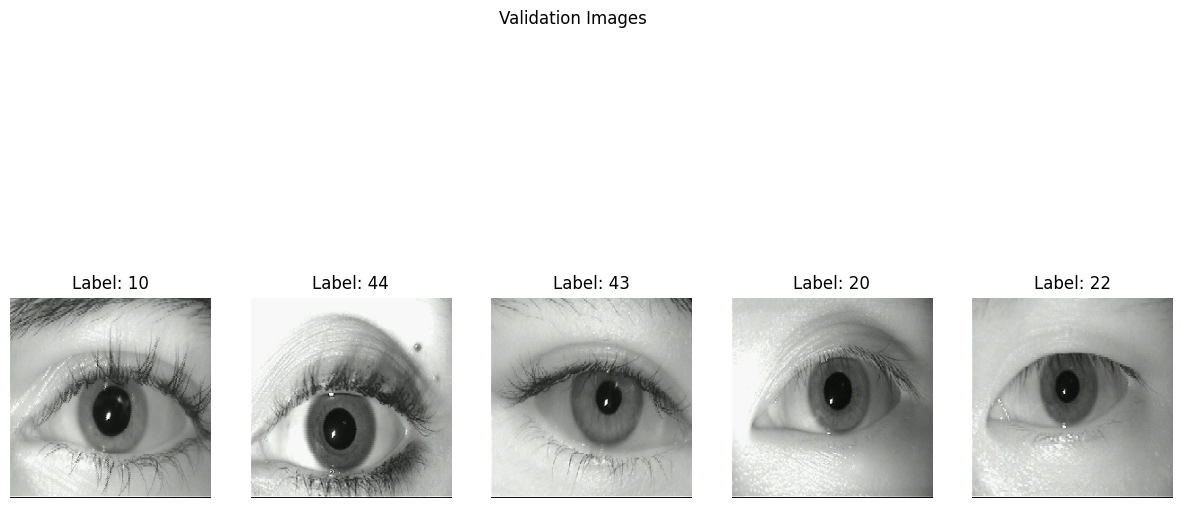

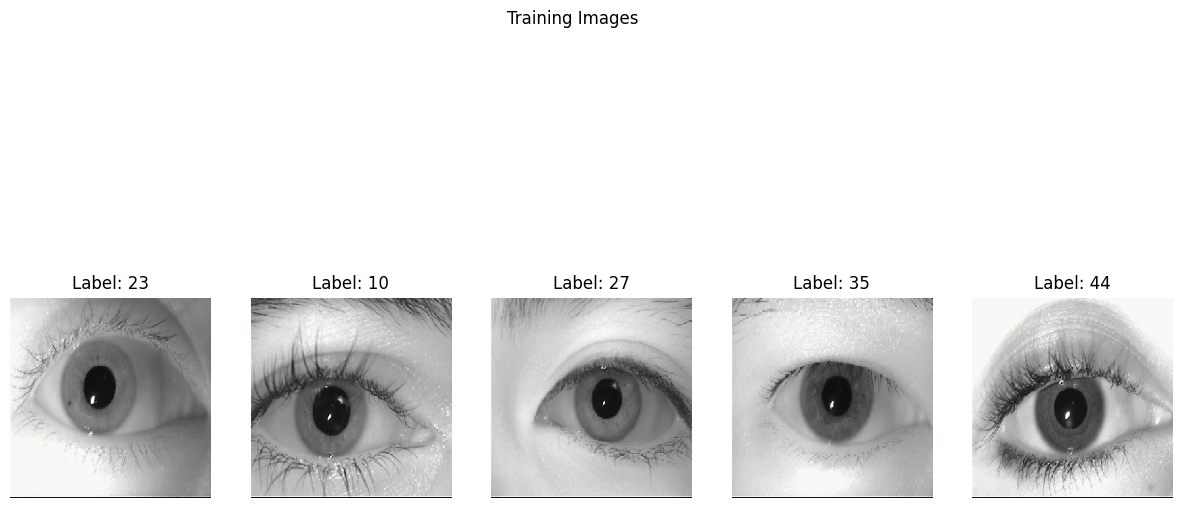

In [76]:
display_images(validation_images, validation_labels, "Validation Images")
display_images(train_images, train_labels, "Training Images")


Image width: 320
Image height: 240


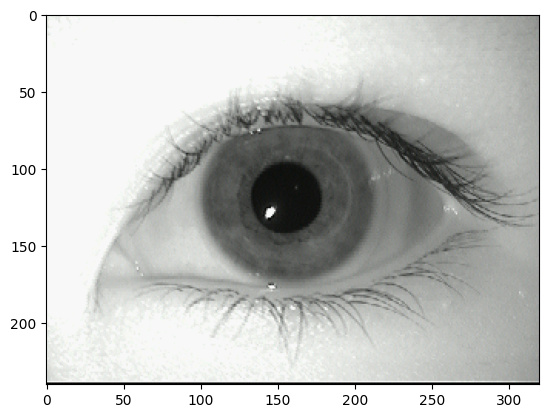

In [77]:
import cv2
from PIL import Image
image_path = '/content/drive/MyDrive/MMU-Iris-Database/1/left/aeval1.bmp'
image = cv2.imread(image_path)
im = Image.open(image_path)
height, width, _ = image.shape

print("Image width:", width)
print("Image height:", height)
plt.imshow(im)

# Buliding a sequential deep learning Model using CNN

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import AveragePooling2D
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(45, activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 186624)            0         
                                                                 
 dense_8 (Dense)             (None, 128)              

# Training the Model

In [79]:
epochs = 30 # Adjust the number of epochs as needed

# Train the model
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/30
11/11 [==============================] - 3s 135ms/step - loss: 8.5117 - accuracy: 0.0152 - val_loss: 3.8046 - val_accuracy: 0.0312
Epoch 2/30
11/11 [==============================] - 1s 118ms/step - loss: 3.7763 - accuracy: 0.0945 - val_loss: 3.7692 - val_accuracy: 0.1094
Epoch 3/30
11/11 [==============================] - 1s 128ms/step - loss: 3.4354 - accuracy: 0.2073 - val_loss: 3.5243 - val_accuracy: 0.1562
Epoch 4/30
11/11 [==============================] - 1s 110ms/step - loss: 2.5911 - accuracy: 0.4390 - val_loss: 3.2159 - val_accuracy: 0.1719
Epoch 5/30
11/11 [==============================] - 1s 118ms/step - loss: 1.4295 - accuracy: 0.6402 - val_loss: 3.0833 - val_accuracy: 0.2969
Epoch 6/30
11/11 [==============================] - 2s 139ms/step - loss: 0.6019 - accuracy: 0.8689 - val_loss: 3.4602 - val_accuracy: 0.2500
Epoch 7/30
11/11 [==============================] - 1s 116ms/step - loss: 0.2331 - accuracy: 0.9482 - val_loss: 3.8383 - val_accuracy: 0.2188
Epoch 

# ploting the results ROC curve

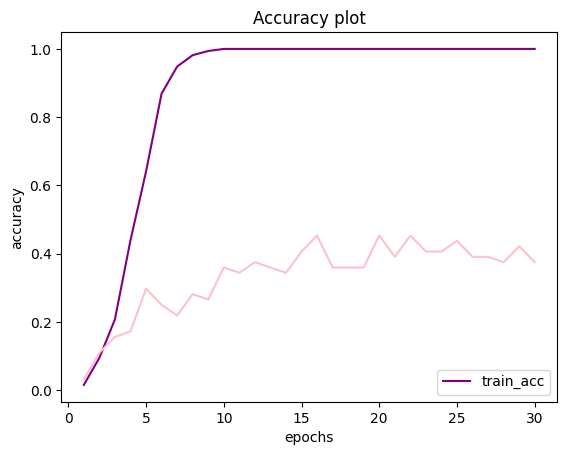

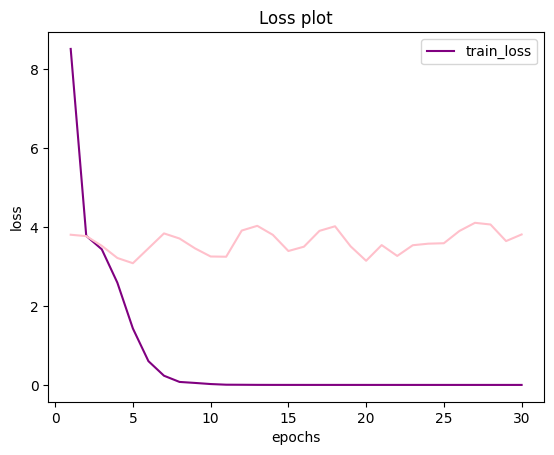

In [80]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss"])
plt.show()

In [81]:
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // 32)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

2/2 [==============================] - 0s 108ms/step - loss: 3.6876 - accuracy: 0.4219
Test Loss: 3.6875619888305664
Test Accuracy: 0.421875


In [84]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Validation and Prediction Results

In [86]:
image_path = '/content/drive/MyDrive/MMU-Iris-Database/16/left/lowyfl1.bmp'
img = image.load_img(image_path, target_size=(224,224,3))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
class_labels = train_generator.class_indices
predicted_class_label = list(class_labels.keys())[predicted_class_index]

print('Predicted class:', predicted_class_label)

1/1 [==============================] - 0s 19ms/step
Predicted class: 16


In [37]:
model.save("Person_identification_iris.h5")